## DNN 与 批归一化

### 批归一化就是在每一个全连接层都作归一化的处理

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os,sys,time
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
X_valid, X_train = X_train[:5000],X_train[5000:]
y_valid, y_train = y_train[:5000],y_train[5000:]

In [3]:
# x = (x - u) / std
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train.astype(np.float32))

StandardScaler()

In [4]:
# X_train_std = std_scaler.transform(X_train.astype(np.float32)).reshape(X_train.shape[0],28,28)
# X_valid_std = std_scaler.transform(X_valid.astype(np.float32)).reshape(X_valid.shape[0],28,28)
# X_test_std = std_scaler.transform(X_test.astype(np.float32)).reshape(X_test.shape[0],28,28)

In [5]:
# 使用sequential
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    """
    方二
    model.add(keras.layers.Dense(100))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    """
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

2021-07-25 17:06:28.697370: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
tf.keras.optimizers.Optimizer?

In [7]:
logdir='./dnn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_minist_model.h5")
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
]

2021-07-25 17:06:30.056758: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-25 17:06:30.056900: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-25 17:06:30.057438: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [8]:
model.layers

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

In [10]:
#关于全连接层参数量的解释，第一个全连接层为例
#[None, 784]* W +b =[None, 300] W.shape=[784, 300], b=[300]
# 784*300 + 300 = 235500

In [11]:
X_train.shape

(55000, 784)

In [13]:
history = model.fit(X_train, y_train, epochs=5,
         validation_data=(X_valid, y_valid),
                   callbacks=callbacks)

Epoch 1/5


2021-07-25 17:06:53.605970: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


  17/1719 [..............................] - ETA: 36s - loss: 2.8772 - accuracy: 0.1085

2021-07-25 17:07:00.120295: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-25 17:07:00.120319: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-25 17:07:00.132365: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-25 17:07:00.146477: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-25 17:07:00.156889: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./dnn-callbacks/train/plugins/profile/2021_07_25_17_07_00
2021-07-25 17:07:00.161059: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./dnn-callbacks/train/plugins/profile/2021_07_25_17_07_00/simodeMacBook-Pro.local.trace.json.gz
2021-07-25 17:07:00.190959: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./dnn-callbacks/train/plugins/profile/2021_07

1719/1719 [==============================] - 20s 8ms/step - loss: 1.1062 - accuracy: 0.6059 - val_loss: 0.6643 - val_accuracy: 0.7654
Epoch 2/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7594 - accuracy: 0.7281 - val_loss: 0.5879 - val_accuracy: 0.7866
Epoch 3/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.6648 - accuracy: 0.7611 - val_loss: 0.5496 - val_accuracy: 0.8042
Epoch 4/5
1719/1719 [==============================] - 19s 11ms/step - loss: 0.6004 - accuracy: 0.7897 - val_loss: 0.5417 - val_accuracy: 0.8084
Epoch 5/5
1719/1719 [==============================] - 22s 13ms/step - loss: 0.5647 - accuracy: 0.8024 - val_loss: 0.4844 - val_accuracy: 0.8256


In [ ]:
history.history

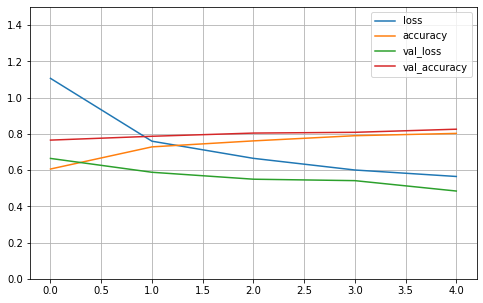

In [15]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1.5)
    plt.show()
plot_learning_curves(history)

In [16]:
model.evaluate(X_test_std,y_test)

NameError: name 'X_test_std' is not defined